1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as scp
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm
import pandas as pd

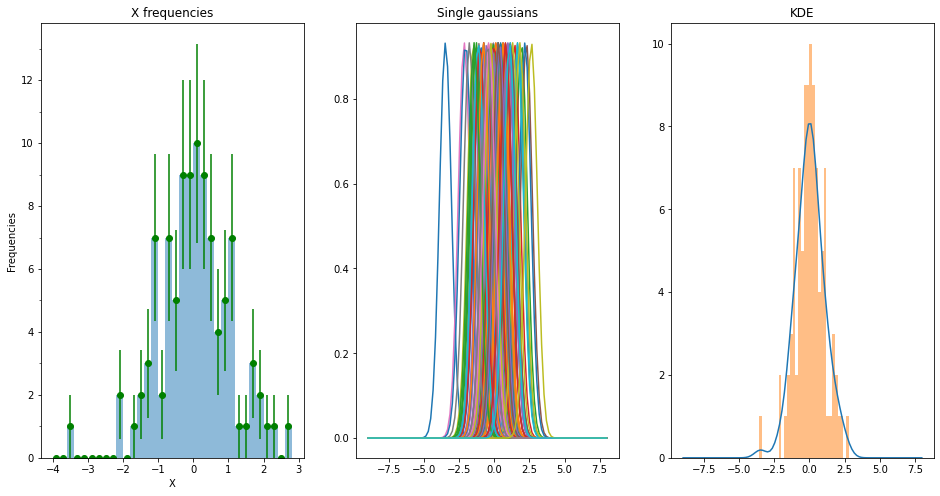

In [2]:
# * Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
mean , sigma = 0.,1.
N = 100.
x = np.array(sigma*np.random.randn(int(N))+mean)

# * Fill an histogram in pyplot taking properly care about the aesthetic
fig, (ax, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
binstep=0.2
counts, bins, bars = ax.hist(x, bins = np.arange(int(x.min()-1),int(x.max()+1),binstep), label = 'x', alpha=0.5)
ax.set_xlabel("X")
ax.set_title('X frequencies')
ax.set_ylabel("Frequencies")
ax.yaxis.set_major_locator(MultipleLocator(N/50.))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
bins = bins[1:]
ax.errorbar(bins-0.1, counts, yerr=np.sqrt(counts), marker='o', c='g', linestyle='None')

# * For every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned.
std = 1.06*x.std()*x.size**-0.2
lsp = np.linspace(int(x.min()-6),int(x.max()+6),100)
gaussians = np.array([norm(i,std).pdf(lsp) for i in x])

# * In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
ax1.set_title("Single gaussians")
for i in gaussians: 
     ax1.plot(lsp, i)

# * Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method
gauss_sum = np.sum(gaussians, axis = 0)
gauss_sum= (gauss_sum*binstep*N)/scp.integrate.trapz(gauss_sum, lsp)
ax2.plot(lsp, gauss_sum)
ax2.set_title("KDE")
ax2.hist(x, bins = np.arange(int(x.min()-1),int(x.max()+1),0.2), label = 'x', alpha=0.5);
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

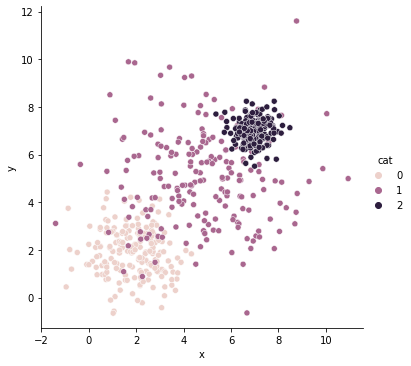

In [3]:
import seaborn as sns
def N_Cat_Generate(mean_devs, N=200):
    AB = []
    for i in np.arange(len(mean_devs)): 
        x = np.random.randn(int(N), 2)*mean_devs[i][1]+mean_devs[i][0]
        for j in x:
                AB.append( (j[0], j[1],i) )
    df = pd.DataFrame(AB)
    df.columns=["x", "y", "cat"]
    return df
    
#fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
A = N_Cat_Generate([[2,1], [5,2], [7,0.5]])
sns.relplot(x="x", y="y", hue="cat", data=A);

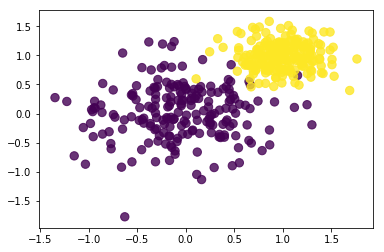

In [4]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
from scipy import  stats
import seaborn as sns
import numpy as numpy
import pandas as pd
filename = "/home/lorenzo/data/residuals_261.npy"
data = np.load(filename, allow_pickle=True)
df = pd.DataFrame(data.item())
df = df[abs(df.residuals)<2]

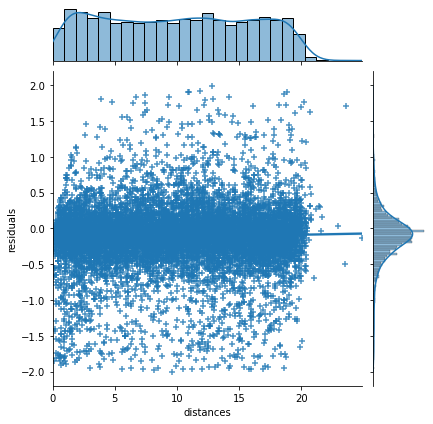

In [6]:
x = np.asarray(df["residuals"])
y = np.asarray(df["distances"])
#slope, intercept, r_value, p_value, std_err =  stats.linregress( df.distances, df.residuals )
#ax = sns.regplot(x=df.distances, y=df.residuals, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
#ax.legend()
sns.jointplot(x=df.distances, y=df.residuals, kind = 'reg', marker = "+", )

means = df.groupby(pd.Series(pd.to_numeric((df[df["distances"]<20.]["distances"]*2).astype(int)) )).mean()
errs  = df.groupby(pd.Series(pd.to_numeric((df[df["distances"]<20.]["distances"]*2).astype(int)) )).std()

#sns.pointplot( x=np.arange(0.25,20.,0.5), y=res.iloc[:,0], errwidth=errs.iloc[:,0])
#
# sns.scatterplot(np.arange(0.25,20,0.5), res.iloc[:,0], c='red');
#errorbar(np.arange(0.25,20.,0.5), means["residuals"], yerr=errs["residuals"], marker='o', c='g', linestyle='None')


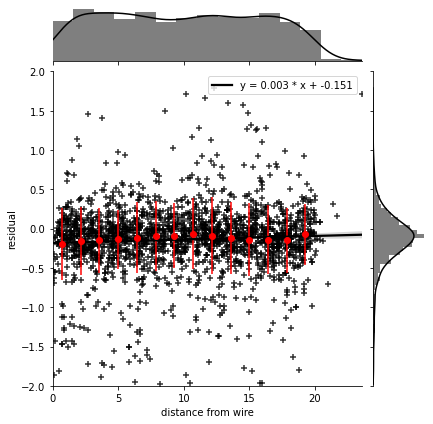

quite similar


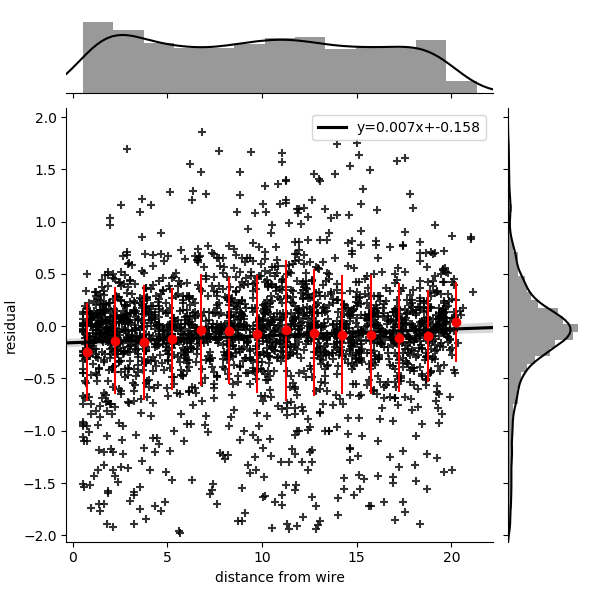

In [44]:
bins1 = np.array(np.arange(0,20))
x = np.histogram( np.asarray(df["residuals"]), bins1)
binnum = 14
historange = 20
bins = np.arange(0.25,historange,historange/binnum)


#df["class"]=pd.Series( pd.to_numeric(df["distances"]*2 ,downcast='unsigned') )
#df["class"]=pd.Series( pd.to_numeric(df["distances"].astype(int)) )
temp = df.groupby(pd.Series(pd.to_numeric((df[df["distances"]<20.]["distances"]*14./20.).astype(int)) ))
means = temp.mean()
errs  = temp.std()

slope, intercept, r_value, p_value, std_err =  stats.linregress( df[df["distances"]<20.].distances, df[df["distances"]<20.].residuals )

sns.jointplot(data = df.iloc[:2000,:], x="distances", y="residuals", kind = "reg", marker = "+", color = 'black', marginal_kws=dict(edgecolor = "none") )
plt.errorbar(np.arange(20/28.,20+20/28.,20./14.), means.iloc[:,0], yerr=errs.iloc[:,0], color='r', marker = 'o', linestyle = "none");
plt.xlabel("distance from wire")
plt.ylabel("residual")
plt.ylim(-2,2)
plt.legend([f"y = {'%.3f'%(slope)} * x + {'%.3f'%(intercept)}"], loc = 'best')
plt.show()
print("quite similar")
from IPython.display import Image
Image("profile.png")